In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from matplotlib import pyplot as plt


In [2]:
train = pd.read_csv('hm_train.csv')
test = pd.read_csv('hm_test.csv')
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [3]:
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [4]:
train.isnull().sum() # there are no null values in the data set 

hmid                  0
reflection_period     0
cleaned_hm            0
num_sentence          0
predicted_category    0
dtype: int64

In [5]:
train.shape # total no of rows = 60321 and 5 columns 

(60321, 5)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

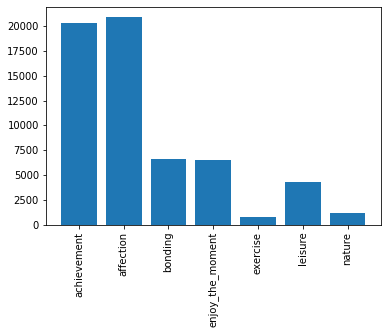

In [6]:
class_tots= train.groupby('predicted_category').count()
plt.bar(class_tots.index,class_tots['hmid'])
plt.xticks(rotation = 'vertical')

In [7]:
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
freq_d = FreqDist()
lema = WordNetLemmatizer()

In [8]:
train.columns

Index(['hmid', 'reflection_period', 'cleaned_hm', 'num_sentence',
       'predicted_category'],
      dtype='object')

In [9]:
train['clean'] = train['cleaned_hm'].str.lower().str.replace('[^a-zA-Z]', ' ')
#converting text to lower case and removing other than plain text 
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,clean
0,27673,24h,I went on a successful date with someone I fel...,1,affection,i went on a successful date with someone i fel...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,i was happy when my son got marks in his e...
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,i went to the gym this morning and did yoga
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,we had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,i went with grandchildren to butterfly display...


In [10]:
stop = set(stopwords.words('english'))

def sw(text):
    text = [lema.lemmatize(word) for word in text.split() if word not in stop]
    return ' '.join(text)
train['clean'] = train['clean'].apply(sw)
train[['cleaned_hm','clean']].head()

,cleaned_hm,clean
0,I went on a successful date with someone I fel...,went successful date someone felt sympathy con...
1,I was happy when my son got 90% marks in his e...,happy son got mark examination
2,I went to the gym this morning and did yoga.,went gym morning yoga
3,We had a serious talk with some friends of our...,serious talk friend flaky lately understood go...
4,I went with grandchildren to butterfly display...,went grandchild butterfly display crohn conser...


In [11]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,clean
0,27673,24h,I went on a successful date with someone I fel...,1,affection,went successful date someone felt sympathy con...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,happy son got mark examination
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,went gym morning yoga
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,serious talk friend flaky lately understood go...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,went grandchild butterfly display crohn conser...


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(train.predicted_category)
train['class'] = le.transform(train.predicted_category)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(train['clean'],train['class'],test_size= 0.2,random_state = 1)
x_train.shape,x_validate.shape,y_train.shape,y_validate.shape

((48256,), (12065,), (48256,), (12065,))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
DTM = CountVectorizer(ngram_range=(2,2)).fit(x_train)
train_dtm = DTM.transform(x_train)
validate_dtm = DTM.transform(x_validate)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(train_dtm,y_train)
validate_pred = model.predict(validate_dtm)

from sklearn.metrics import f1_score
f1_score(y_validate,validate_pred,average='weighted')

In [15]:
#from sklearn.svm import SVC

In [16]:
#svm_model = SVC(C=1.0,gamma='scale',cache_size=7000,kernel='linear')

In [17]:
#svm_model.fit(train_dtm,y_train)